In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\ajiri\\Documents\\datasets\\isreal\\fatalities_isr_pse_conflict_2000_to_2023.csv')

In [3]:
df.head(20)

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
5,'Ata Yasser 'Ata Musa,2023-09-19,29.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-20,M,NaN,Jenin,Jenin,gunfire,missile,Israeli security forces,Wounded by shrapnel from a missile fired by Is...
6,Yusef Salem Yusef Radwan,2023-09-19,24.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-09-19,M,No,Khan Yunis,Khan Yunis,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while participating i...
7,Mahmoud Khaled S'ud 'Ar'arawi,2023-09-19,25.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin R.C.,Jenin,gunfire,missile,Israeli security forces,Wounded by shrapnel from a missile fired by Is...
8,Mahmoud 'Ali Nafe'a a-S'adi,2023-09-19,23.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin R.C.,Jenin,gunfire,missile,Israeli security forces,Wounded by shrapnel from a missile fired by Is...
9,Milad Munzer Wajih a-Ra'i,2023-09-09,15.0,Palestinian,al-'Arrub R.C.,Hebron,West Bank,2023-09-09,M,NaN,al-'Arrub Camp,Hebron,gunfire,live ammunition,Israeli security forces,Fatally shot by a soldier after throwing two M...


In [4]:
plt.figure(figsize = (10,10))
plt.subplots

<function matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)>

<Figure size 1000x1000 with 0 Axes>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [6]:
df.isnull().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

###Data cleaning 

In [7]:
mean_age = df['age'].mean()
df['age'].fillna(mean_age, inplace=True)

In [8]:
df['age'] = df['age'].astype(int)

In [9]:
mode_gender = df['gender'].mode()[0]
df['gender'].fillna(mode_gender, inplace=True)

In [10]:
mode_value = df['took_part_in_the_hostilities'].mode()[0]
df['took_part_in_the_hostilities'].fillna(mode_value, inplace=True)


In [11]:
mode_value = df['place_of_residence'].mode()[0]
df['place_of_residence'].fillna(mode_value, inplace=True)

In [12]:
mode_value = df['place_of_residence_district'].mode()[0]
df['place_of_residence_district'].fillna(mode_value, inplace=True)

In [13]:
mode_value = df['type_of_injury'].mode()[0]
df['type_of_injury'].fillna(mode_value, inplace=True)

In [14]:
mode_value = df['ammunition'].mode()[0]
df['ammunition'].fillna(mode_value, inplace=True)

In [15]:
mode_value = df['ammunition'].mode()[0]
df['ammunition'].fillna(mode_value, inplace=True)

In [16]:
df['notes'].fillna('No information', inplace=True)

In [17]:
df.isnull().sum()

name                            0
date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
ammunition                      0
killed_by                       0
notes                           0
dtype: int64

In [18]:
df.describe()

,age
count,11124.000000
mean,26.737055
std,13.700637
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


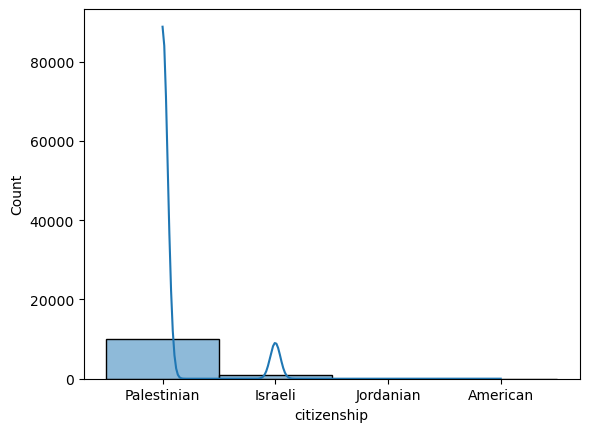

In [19]:
df.columns
sns.histplot(df['citizenship'], kde = True)
plt.savefig('citizenship.jpg')


<function matplotlib.pyplot.show(close=None, block=None)>

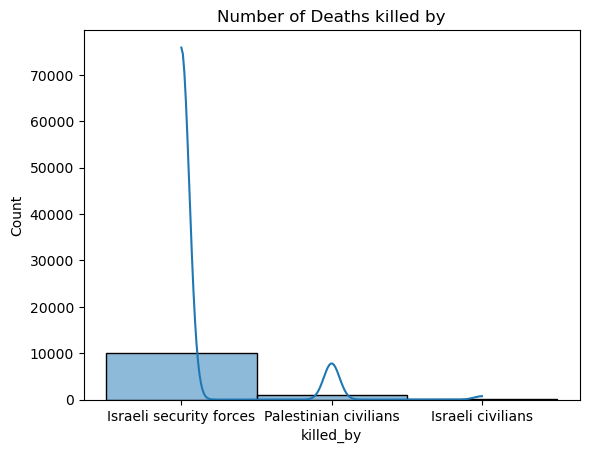

In [40]:
df.columns
sns.histplot(df['killed_by'], kde = True)
plt.title('Number of Deaths killed by')
plt.show


C:\Users\ajiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

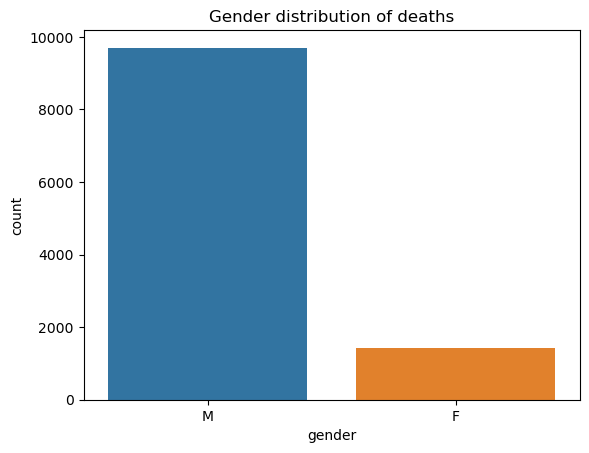

In [21]:
sns.countplot(df['gender'])
plt.title('Gender distribution of deaths')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

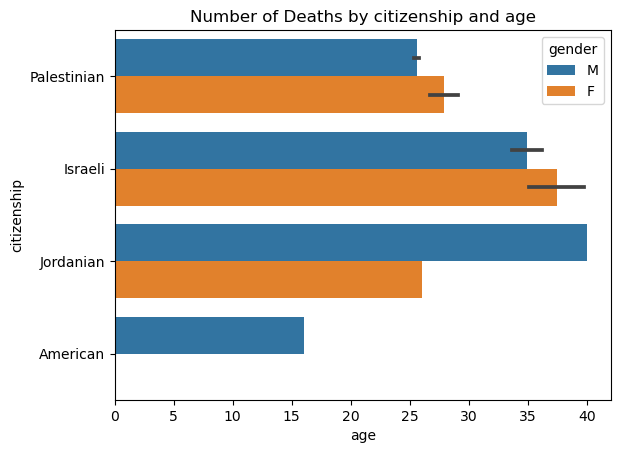

In [22]:
sns.barplot(x = 'age', y = 'citizenship', hue = 'gender', data = df)
plt.title('Number of Deaths by citizenship and age')
plt.show

In [23]:
death_counts = df['citizenship'].value_counts()

In [24]:
death_counts

Palestinian    10092
Israeli         1029
Jordanian          2
American           1
Name: citizenship, dtype: int64

In [25]:
palestinian_killed_by = df[df['citizenship'] == 'Palestinian']['killed_by'].value_counts()
israeli_killed_by = df[df['citizenship'] == 'Israeli']['killed_by'].value_counts()

In [26]:
print("Palestinian Deaths - Responsible Groups:")
print(palestinian_killed_by)

Palestinian Deaths - Responsible Groups:
Israeli security forces    9996
Israeli civilians            96
Name: killed_by, dtype: int64


In [27]:
print("Israeli Deaths - Responsible Groups:")
print(israeli_killed_by)

Israeli Deaths - Responsible Groups:
Palestinian civilians      1028
Israeli security forces       1
Name: killed_by, dtype: int64


In [28]:
deaths_by_region = df.groupby('event_location_region')['name'].count()
deaths_by_region

event_location_region
Gaza Strip    7733
Israel         679
West Bank     2712
Name: name, dtype: int64

Text(0.5, 1.0, 'Number of Deaths by Location Region')

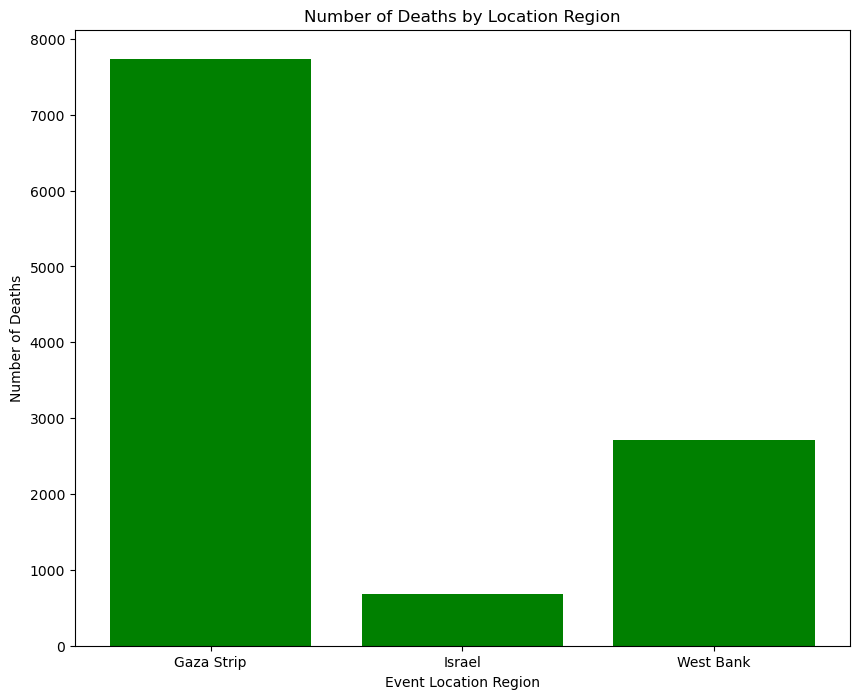

In [35]:
plt.figure(figsize=(10, 8))
plt.bar(deaths_by_region.index, deaths_by_region.values, color='green')
plt.xlabel('Event Location Region')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Location Region')

In [30]:
df['date_of_event'] = pd.to_datetime(df['date_of_event'])

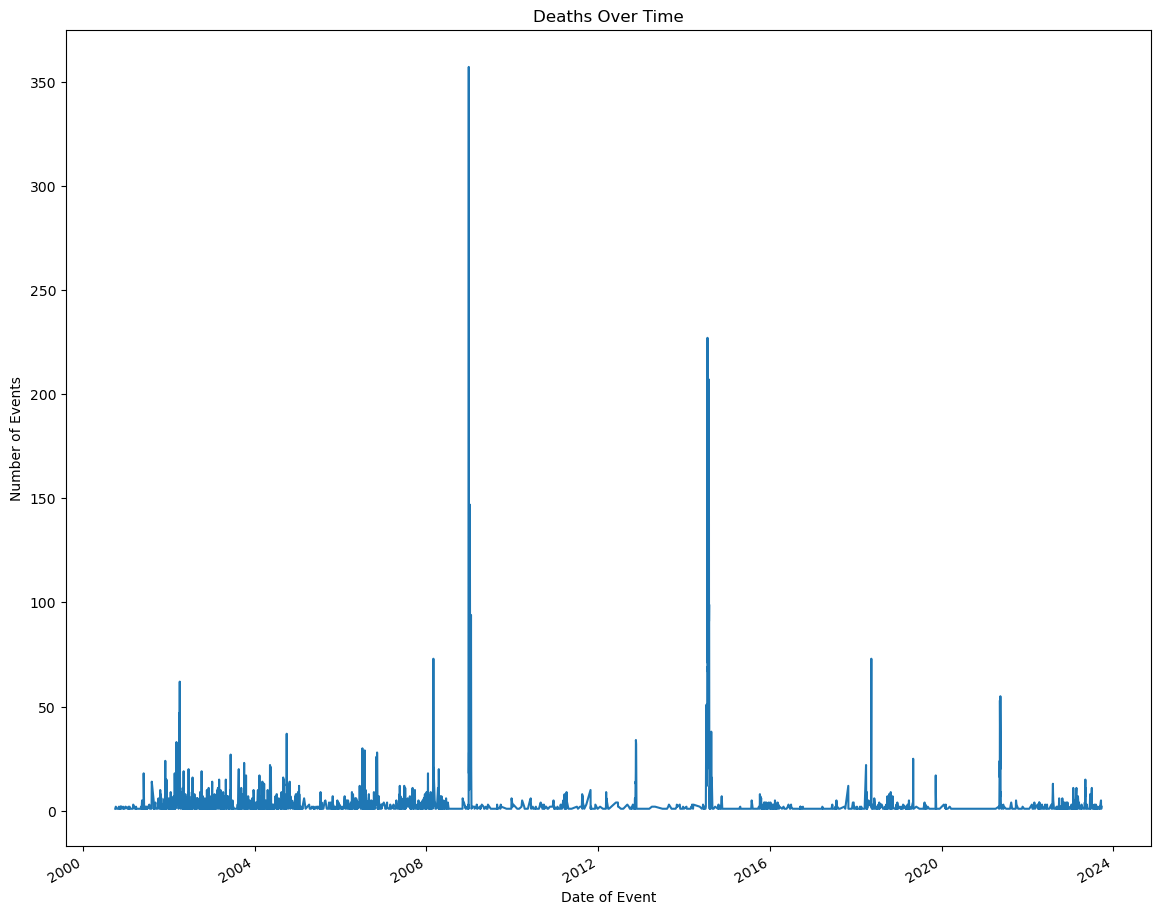

In [36]:
events_per_day = df.groupby('date_of_event').size()

plt.figure(figsize=(14, 12))
events_per_day.plot()
plt.title('Deaths Over Time')
plt.xlabel('Date of Event')
plt.ylabel('Number of Events')
plt.show()

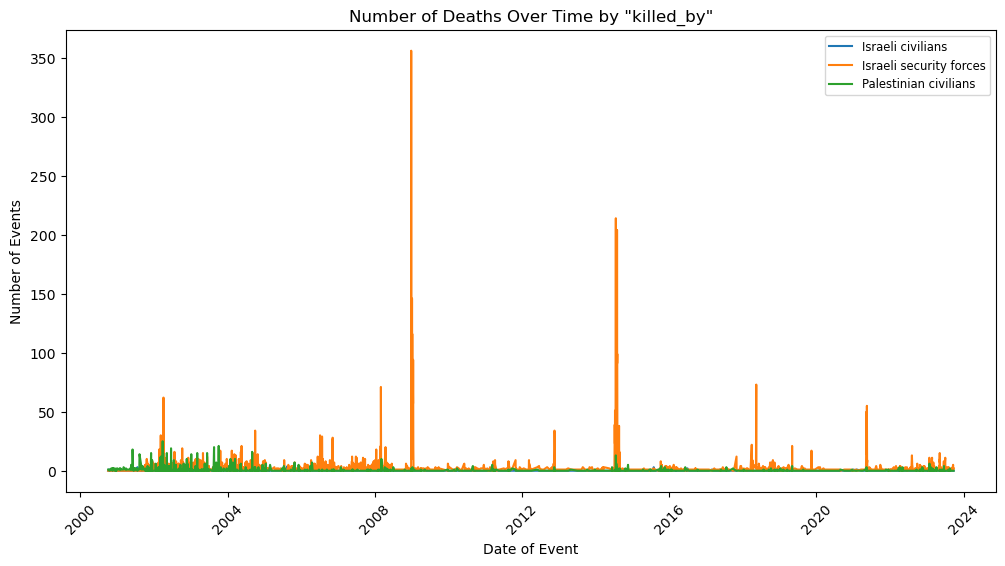

In [37]:
events_by_killed_by = df.groupby(['date_of_event', 'killed_by']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
for column in events_by_killed_by.columns:
    plt.plot(events_by_killed_by.index, events_by_killed_by[column], label=column)

plt.title('Number of Deaths Over Time by "killed_by"')
plt.xlabel('Date of Event')
plt.ylabel('Number of Events')
plt.legend(loc='upper right', fontsize='small')
plt.xticks(rotation=45)
plt.show()

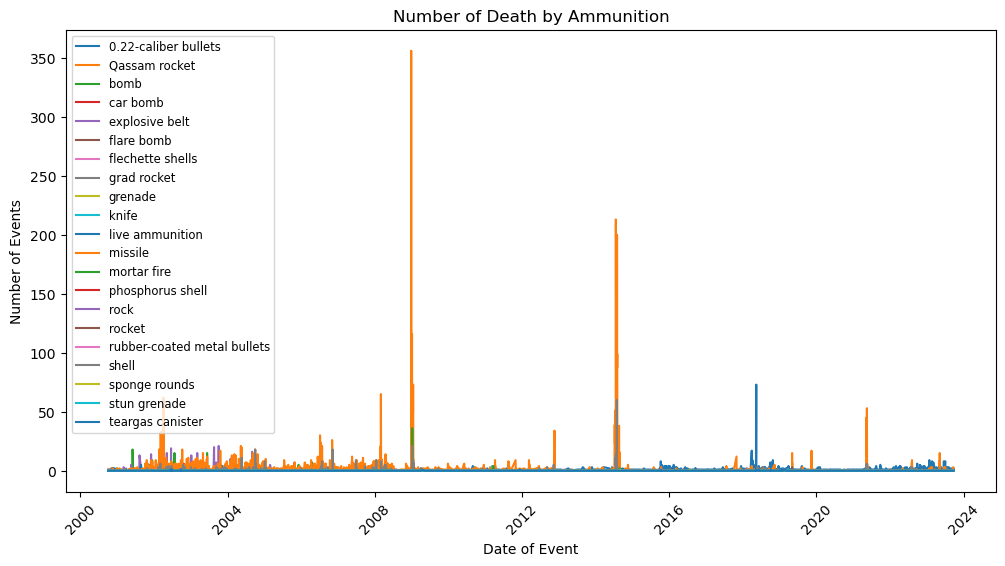

In [33]:

events_by_ammunition = df.groupby(['date_of_event', 'ammunition']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
for column in events_by_ammunition.columns:
    plt.plot(events_by_ammunition.index, events_by_ammunition[column], label=column)

plt.title('Number of Death by Ammunition')
plt.xlabel('Date of Event') 
plt.ylabel('Number of Events')
plt.legend(loc='upper left', fontsize='small')
plt.xticks(rotation=45)
plt.show()

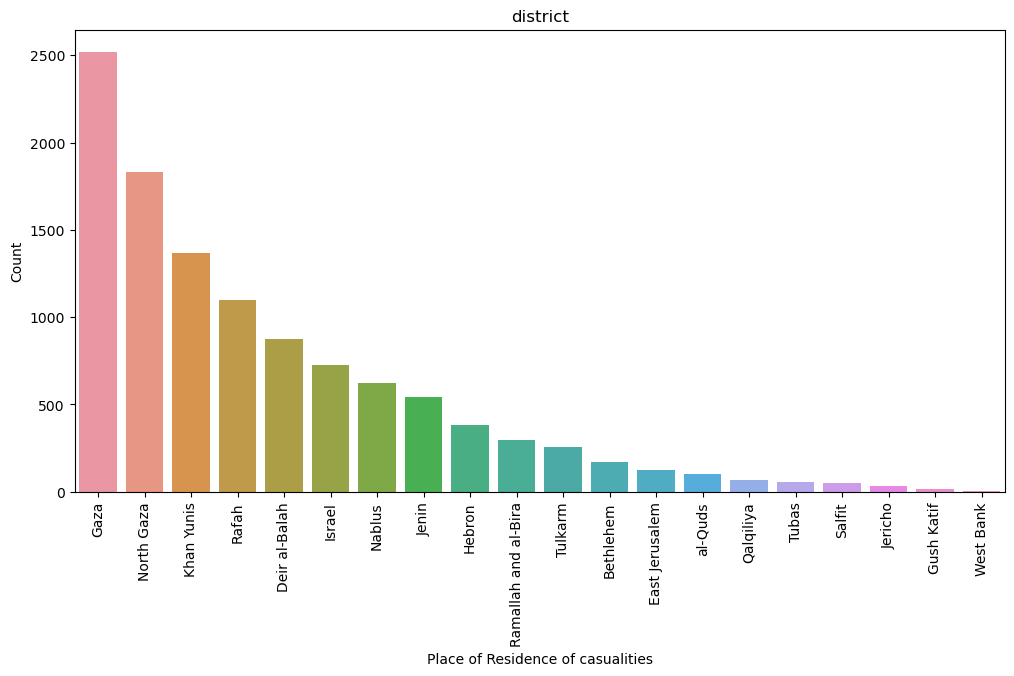

In [39]:
place_of_residence_district = df['place_of_residence_district'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=place_of_residence_district.index, y=place_of_residence_district.values)
plt.title('district')
plt.xlabel('Place of Residence of casualities')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()